모델 설계
===
## 1. 모델의 정의
* Sequential() 함수를 model로 선언해놓고 model.add()라는 라인을 추가하여 새로운 층을 추가함.
* 아래의 예시 코드에서는 model.add()로 시작하는 라인이 두 개 있으므로, 두 개의 층을 가진 모델을 만든 것이고, 가장 마지막 층이 결과를 출력하는 '출력층', 나머지는 모두 '은닉층'이 됨.
* model.add(Dense(30, input_dim=17, activation="relu"))
  * node 30개, 입력 데이터의 개수는 17(input_dim)
  * keras는 입력층을 따로 만드는 것이 아니라, 첫번째 은닉층에 input_dim을 적어서 첫 번째 Dense가 은닉층+입력층의 역할을 겸함.
  * 예시의 데이터(폐암 환자의 생존 여부)는 17개의 입력값(독립변수)가 있으므로, 데이터에서 17개의 값을 받아 은닉층의 30개 노드로 보낸다는 뜻.

In [12]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옴
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옴
import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분.
np.random.seed(3)
tf.random.set_seed(3)

# 준비된 수술 환자 데이터를 불러들임.
Data_set = np.loadtxt("csv_data\ThoraricSurgery.csv", delimiter=",")

# 환자의 기록과 수술 경과를 X와 Y로 구분하여 저장함.
X = Data_set[:, 0:17]
Y = Data_set[:,17]

# 딥러닝 구조를 결정함(모델을 설정하고 실행하는 부분).
model = Sequential()
model.add(Dense(30, input_dim=17, activation="relu"))   # 노드 30 개 은닉층
model.add(Dense(1, activation="sigmoid"))               # 노드 1 개 출력층

# 딥러닝을 실행
model.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuracy"])
history2 = model.fit(X, Y, epochs=10, batch_size=10)

Epoch 1/10
47/47 [==============================] - 0s 590us/step - loss: 0.6482 - accuracy: 0.8128
Epoch 2/10
47/47 [==============================] - 0s 609us/step - loss: 0.4890 - accuracy: 0.8468
Epoch 3/10
47/47 [==============================] - 0s 614us/step - loss: 0.4416 - accuracy: 0.8511
Epoch 4/10
47/47 [==============================] - 0s 674us/step - loss: 0.4863 - accuracy: 0.8489
Epoch 5/10
47/47 [==============================] - 0s 587us/step - loss: 0.4430 - accuracy: 0.8532
Epoch 6/10
47/47 [==============================] - 0s 633us/step - loss: 0.4303 - accuracy: 0.8532
Epoch 7/10
47/47 [==============================] - 0s 600us/step - loss: 0.4421 - accuracy: 0.8511
Epoch 8/10
47/47 [==============================] - 0s 696us/step - loss: 0.4363 - accuracy: 0.8489
Epoch 9/10
47/47 [==============================] - 0s 614us/step - loss: 0.4165 - accuracy: 0.8489
Epoch 10/10
47/47 [==============================] - 0s 630us/step - loss: 0.4317 - accuracy: 0.8489

In [5]:
history.history     # 에포크 별 손실과 정확도 표시

{'loss': [0.6482216715812683,
  0.48902347683906555,
  0.44164735078811646,
  0.4862949252128601,
  0.4430175721645355,
  0.43030914664268494,
  0.4421369135379791,
  0.43626195192337036,
  0.4164518117904663,
  0.4317093789577484,
  0.445814847946167,
  0.4384354054927826,
  0.46514859795570374,
  0.44745567440986633,
  0.493400901556015,
  0.4471505284309387,
  0.47471120953559875,
  0.44875475764274597,
  0.440741628408432,
  0.4379560053348541,
  0.43314385414123535,
  0.42423954606056213,
  0.4183190166950226,
  0.43033096194267273,
  0.42463505268096924,
  0.43353161215782166,
  0.4492495357990265,
  0.42414700984954834,
  0.42123445868492126,
  0.41357138752937317,
  0.4388585090637207,
  0.4187561869621277,
  0.4427948594093323,
  0.41033434867858887,
  0.417768657207489,
  0.41362571716308594,
  0.44290390610694885,
  0.42581018805503845,
  0.47140905261039734,
  0.40409055352211,
  0.4209672212600708,
  0.4418415427207947,
  0.40958476066589355,
  0.4032115936279297,
  0.4067

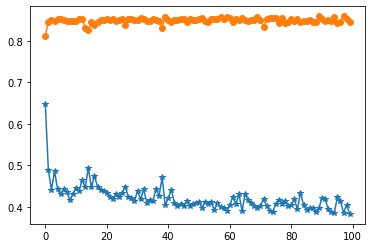

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], marker="*")
plt.plot(history.history["accuracy"], marker="o")
plt.show()  # 100번 에포크 수행시, 수행 횟수 증가에 따라 개선효과 체감.

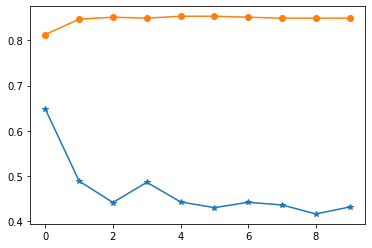

In [13]:
plt.plot(history2.history["loss"], marker="*")
plt.plot(history2.history["accuracy"], marker="o")
plt.show()  # 10번 수행시에도 100번 에포크 수행한 결과에 비해 크게 부족하지 않음.
            # 굳이 많이 할 필요 없다. history를 통해 적절한 수준 찾아낼 수 있음.

## 2. 입력층, 은닉층, 출력층
* 은닉층의 각 노드는 17개 입력 값에서 임의의 가중치를 가지고 각 노드로 전송되어 활성화 함수를 만남.
* 활성화 함수를 거친 결괏값이 출력층으로 전달됨.
* 다음에 나오는 activation 부분에 우리가 원하는 활성화 함수를 적어 주면 됨.
* 여기서는 ReLU 사용.
## 3. 모델 컴파일
* model.compile에서는 앞서 지정한 모델이 효과적으로 구현될 수 있게 여러 가지 환경 설정 및 컴파일.
* 오차 함수(loss), 최적화(optimizer), 모델 수행 결과 평가(metrics).
  * 오차 함수 : 여기서는 MSE(mean_squared_error)를 사용함.
## 4. 교차 엔트로피
* 교차 엔트로피는 주로 분류 문제에서 많이 사용되는데(ex.폐암 환자의 생존/사망 분류) 특별히 예측 값이 참과 거짓 둘 중 하나인 형식일 때는 binary_crossentropy(이항 교차 엔트로피)를 씀.
* 이를 실행하면 예측 정확도(accuracy)가 약간 향상되는 것을 알 수 있음.
## 5. 모델 실행
* 주어진 폐암 수술 환자의 생존 여부 데이터는 총 470명의 환자의 17개의 정보를 정리한 것.
  * 속성(또는 feature, 독립변수) : 17개의 환자 정보
  * 샘플 : 가로 한 줄에 해당하는 각 환자의 정보
  * 클래스(종속변수) : 생존 여부
  * 주어진 데이터에는 총 470개의 샘풀이 각각 17개씩의 속성을 가지고 있는 것

* epoch vs batch
  * epoch는 학습 프로세스가 모든 샘플에 대해 한 번 실행되는 것.
    * 위 코드에서 100 epoch이므로 각 샘플이 처음부터 끝까지 100번 재사용될 때까지 학습하라는 것.
  * batch는 샘플을 한 번에 몇 개씩 처리할지 정하는 부분.
    * batch_size = 10은 전체 470개 샘플을 10개씩 끊어서 집어넣으라는 뜻
    * batch_size가 너무 작으면 학습 속도가 느려지고, 너무 크면 결과값이 불안정해짐(컴퓨터의 메모리가 감당할 만큼의 batch_size를 설정해주는 것이 좋음).